In [5]:
import torch
import numpy as np
from matplotlib import pyplot as plt 

生成输入数据x以及目标数据y

In [6]:
np.random.seed(100)
x = np.linspace(-1,1,100).reshape(100,1)
y = 3*np.power(x,2) + 2 + 0.2 * np.random.rand(x.size).reshape(100,1)

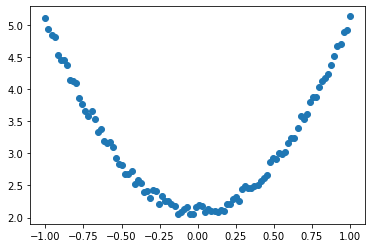

In [7]:
plt.scatter(x,y)
plt.show()

In [8]:
w1 = np.random.rand(1,1)
b1 = np.random.rand(1,1)
print(w1,b1)

[[0.77828922]] [[0.7795984]]


训练模型

In [9]:
lr = 0.001
for i in range(800):
    y_pred = np.power(x,2)* w1  + b1
    loss = 0.5 * (y_pred - y)**2
    loss = loss.sum()
    #计算梯度
    grad_w = np.sum((y_pred - y)*np.power(x,2))
    grad_b = np.sum((y_pred -y))
    #梯度下降
    w1 -= lr * grad_w
    b1 -= lr * grad_b

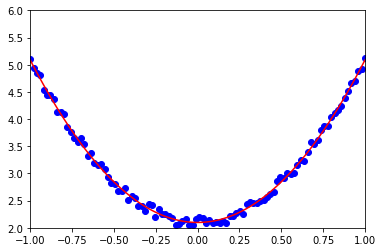

[[2.98927619]] [[2.09818307]]


In [10]:
#可视化
plt.plot(x, y_pred, 'r-', label = 'predict')
plt.scatter(x, y, color = 'blue', marker= 'o', label = 'true')
plt.xlim(-1,1)
plt.ylim(2,6)
plt.show()
print(w1,b1)

tensor以及autograd实现机器学习

In [11]:
import torch as t
from matplotlib import pyplot as plt

In [14]:
t.manual_seed(100)
dtype = t.float
x = t.unsqueeze(torch.linspace(-1,1,100), dim = 1)
y = 3 * x.pow(2) + 2 + 0.2 * torch.rand(x.size())

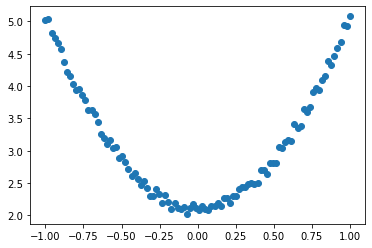

In [17]:
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [18]:
#初始化权重参数
w = t.rand(1,1, dtype = dtype, requires_grad = True)
b = t.zeros(1,1,dtype = dtype, requires_grad = True)

In [19]:
#训练模型
lr = 0.001
for ii in range(800):
    #前向传播
    y_prediction = x.pow(2).mm(w) + b 
    loss = 0.5 * (y_prediction - y)**2
    loss = loss.sum()
    #自动计算梯度,存放在grad属性中
    loss.backward()
    #手动更新参数
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
    #梯度清零
    w.grad.zero_()
    b.grad.zero_()

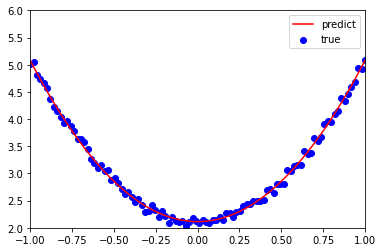

In [20]:
plt.plot(x.numpy(), y_prediction.detach().numpy(), 'r-', label = 'predict')
plt.scatter(x.numpy(), y.numpy(), color = 'blue', marker= 'o', label = 'true')
plt.xlim(-1,1)
plt.ylim(2,6)
plt.legend()
plt.show()